<a href="https://colab.research.google.com/github/PozzOver13/learning/blob/main/bayesian_modeling/20250121_gaussian_process_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Processes

## GPs a definition

A Gaussian Process (GP) is a flexible probabilistic model used to describe **distributions over functions**. A Gaussian
process model describes a probability distribution over
possible functions that fit a set of points. It is defined as a collection of random variables, any finite subset of which follows a multivariate normal distribution. A GP is fully specified by its **mean function** (which describes the average behavior of the function) and a **covariance (kernel) function**, which encodes the relationships or similarities between points. GPs are commonly used for regression and classification tasks, providing not only predictions but also uncertainty estimates for those predictions, making them particularly useful for tasks requiring interpretable and reliable modeling.

Key elements:
1. multivariate normal distribution
1. kernels
1. non-parametric models
1. joint and conditional probability



## Multivariate Normale Distribution

A multivariate normal distribution is a generalization of the one-dimensional normal distribution to higher dimensions. It describes a probability distribution for a random vector where each linear combination of its components has a univariate normal distribution. Key characteristics include:

- Defined by a mean vector μ and a covariance matrix Σ
- Symmetric, bell-shaped probability density in multiple dimensions
- Captures correlations between different variables
- Probability density follows a multivariate Gaussian probability density function
- Critical in statistical modeling, machine learning, and probabilistic inference

Mathematically, it allows modeling complex, correlated random variables with a single, flexible probabilistic framework.

### Gaussian Distribution

3Blue1Brown: https://youtu.be/cy8r7WSuT1I?si=eDsyuQcX82viXEr9

Mean: 0.00
Variance: 3.94


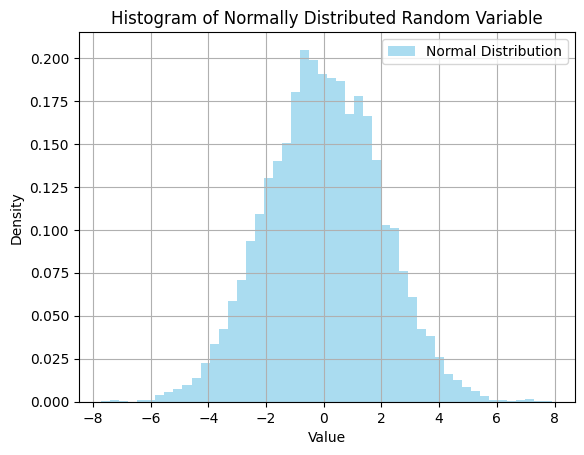

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set mean and standard deviation
mean = 0
std_dev = 2  # Standard deviation for values to lie mostly between -4 and 4
variance = std_dev**2

# Generate random samples
num_samples = 10000
random_variable = np.random.normal(mean, std_dev, num_samples)

# Print summary
print(f"Mean: {np.mean(random_variable):.2f}")
print(f"Variance: {np.var(random_variable):.2f}")

# Plot the histogram
plt.hist(random_variable, bins=50, density=True, alpha=0.7, color='skyblue', label="Normal Distribution")
plt.title("Histogram of Normally Distributed Random Variable")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()


### Multivariate Normal Distribution

$$
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
\sim \mathcal{N} \left(
\begin{bmatrix}
\mu_1 \\
\mu_2
\end{bmatrix},
\begin{bmatrix}
\sigma_{11} & \sigma_{12} \\
\sigma_{21} & \sigma_{22}
\end{bmatrix}
\right) = \mathcal{N}(\mu, \Sigma).
$$


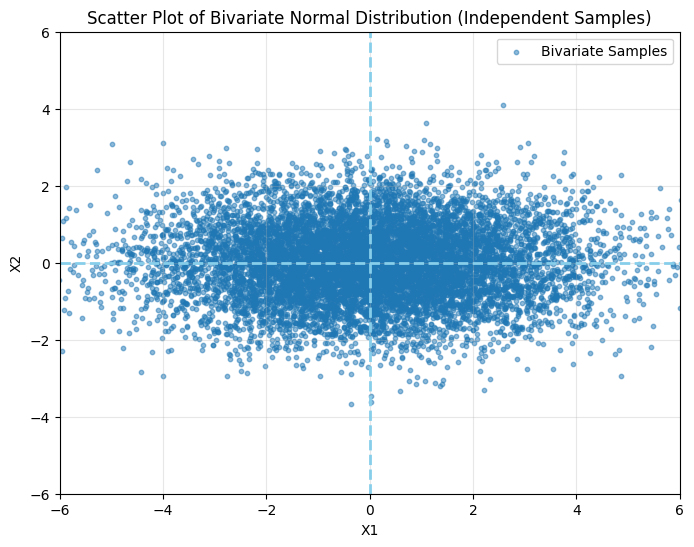

Mean of X1: -0.01, Variance of X1: 4.11
Mean of X2: -0.00, Variance of X2: 0.98


In [2]:
# Parameters for the bivariate normal distribution
mean1, mean2 = 0, 0  # Means of the two variables
std_dev1, std_dev2 = 2, 1  # Standard deviations of the two variables
num_samples = 10000  # Number of samples

# Generate two independent normal distributions
x1 = np.random.normal(mean1, std_dev1, num_samples)
x2 = np.random.normal(mean2, std_dev2, num_samples)

# Combine into a bivariate distribution
bivariate_data = np.column_stack((x1, x2))

# Plot the bivariate distribution as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(bivariate_data[:, 0], bivariate_data[:, 1], alpha=0.5, s=10, label="Bivariate Samples")
plt.axhline(0, color='skyblue', linestyle='--', linewidth=2)
plt.axvline(0, color='skyblue', linestyle='--', linewidth=2)
plt.title("Scatter Plot of Bivariate Normal Distribution (Independent Samples)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Print sample summary
print(f"Mean of X1: {np.mean(x1):.2f}, Variance of X1: {np.var(x1):.2f}")
print(f"Mean of X2: {np.mean(x2):.2f}, Variance of X2: {np.var(x2):.2f}")


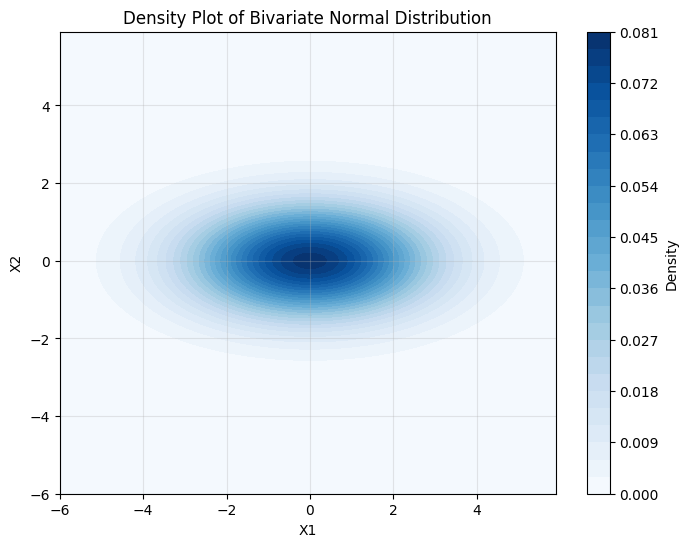

In [3]:
from scipy.stats import multivariate_normal

# Parameters for the bivariate normal distribution
mean = [0, 0]  # Means of the two variables
cov = [[4, 0], [0, 1]]  # Covariance matrix (std_dev1^2 and std_dev2^2 with no correlation)

# Define the grid for the density plot
x, y = np.mgrid[-6:6:0.1, -6:6:0.1]  # Create a grid of x and y values
pos = np.dstack((x, y))  # Stack the grid to create coordinate pairs

# Create the multivariate normal distribution
rv = multivariate_normal(mean, cov)

# Compute the PDF (density) for the grid
pdf = rv.pdf(pos)

# Plot the density contour plot
plt.figure(figsize=(8, 6))
plt.contourf(x, y, pdf, cmap="Blues", levels=30)  # Filled contour plot
plt.colorbar(label="Density")
plt.title("Density Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(alpha=0.3)
plt.show()


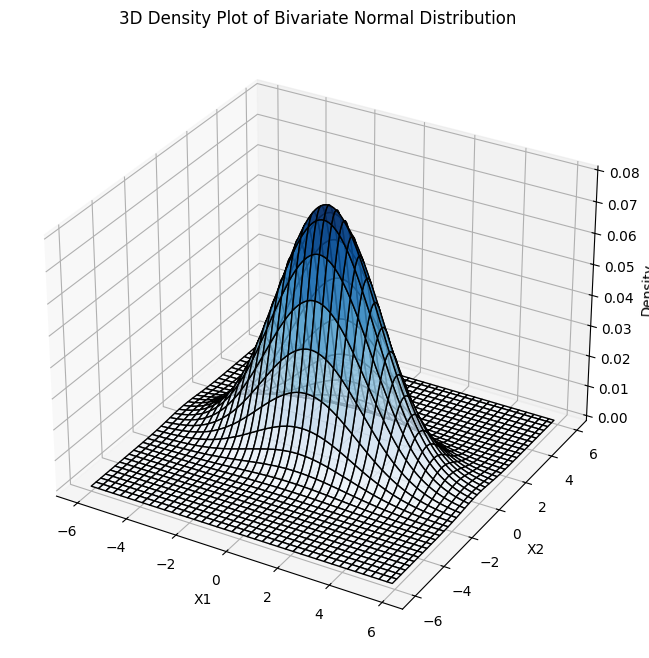

In [4]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, pdf, cmap="Blues", edgecolor="k", alpha=0.8)

# Customize the plot
ax.set_title("3D Density Plot of Bivariate Normal Distribution")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Density")
plt.show()

### Covariance matrix and Covariates

**Covariance Matrix**:
The covariance matrix is a key concept in multivariate statistics, particularly for distributions like the multivariate normal. It captures the variances of each variable (on the diagonal) and the covariances (off-diagonal) between every pair of variables.

$$
Σ =
\begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1, X_2) \\
\text{Cov}(X_2, X_1) & \text{Var}(X_2)
\end{bmatrix}
$$

**Components**:

1. **Diagonal Elements $(Var(X))$**:
    - Represent the variance of each variable.
    - $Var(X)=σ2$, where $σ$ is the standard deviation.
1. **Off-Diagonal Elements $(Cov(X_1, X_2))$**:
    - Represent the covariance between pairs of variables
    - $Cov(X_1, X_2) = E[(X1−μ1)(X2−μ2)]$, where $μ1$ and $μ2$ are the means of $X_1$ and $X_2$, respectly.

**Interpretation**:

- **Positive Covariance**: If $Cov(X1,X2)>0$, the variables tend to increase or decrease together.
- **Negative Covariance**: If $Cov(X1,X2)<0$, one variable tends to increase as the other decreases.
- **Zero Covariance**: Indicates independence, but not always.

**Covariates:**

Covariates are the **independent variables** or **predictors** in a model. These variables are thought to have an influence on the **dependent variable** (the outcome you're modeling or predicting). Covariates are used in regression, machine learning models, and causal analysis.

Example of Covariates:

- In a model predicting house prices:
    - Covariates: Number of bedrooms, square footage, location, etc.
    - Dependent Variable: House price.

## Kernel

A kernel, also known as a covariance function, is a mathematical function that defines the similarity or relationship between pairs of input points in a Gaussian Process (GP). It determines the shape and smoothness of the functions that the GP can model by specifying how much two points influence each other. Kernels encode assumptions about the underlying data, such as periodicity, smoothness, or linearity, and are central to the GP's flexibility. In a GP, the kernel generates the covariance matrix, which is used to make predictions and quantify uncertainty for new data points. Common kernels include the squared exponential (RBF), Matérn, and periodic kernels.

    similar inputs should yield similar outputs

**Gaussian or Radial Basis Function (RBF)**

$$
k(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2 \ell^2}\right)
$$

Where $x'$ refers to a point in the input space that you are comparing to another point.

The kernel function $𝑘(x, x')$ calculates a measure of similarity between $𝑥$ and $x'$ based on their distance. If $𝑥$ and $x'$ are close, the similarity value will be high (close to 1 for the RBF kernel). If they are far apart, the similarity will decay towards 0, controlled by the kernel's length scale parameter ($ℓ$).




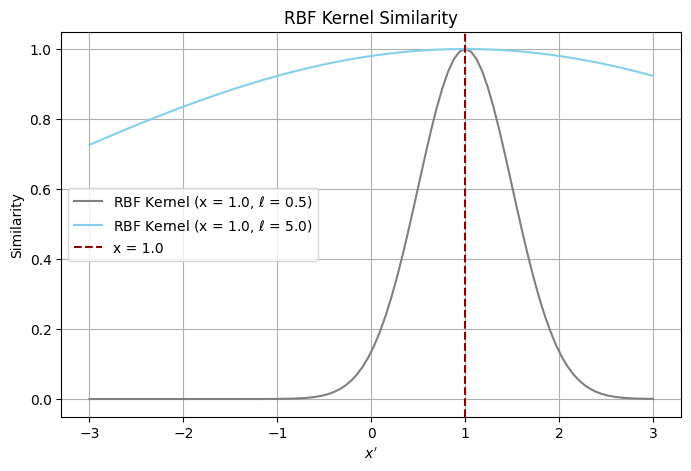

In [5]:
# RBF Kernel function
def rbf_kernel(x, x_prime, length_scale=1.0):
    """
    Computes the RBF kernel similarity between two points.

    Parameters:
        x: scalar or numpy array
        x_prime: scalar or numpy array
        length_scale: positive float (controls smoothness)
    Returns:
        similarity: float
    """
    return np.exp(-np.linalg.norm(x - x_prime)**2 / (2 * length_scale**2))

# Define some points
x = 1.0  # First point
x_prime_values = np.linspace(-3, 3, 100)  # Range of second points

length_scale_1 = 0.5  # Set the length scale
length_scale_2 = 5.0  # Set the length scale

# Compute similarities
similarities_1 = [rbf_kernel(x, x_prime, length_scale_1) for x_prime in x_prime_values]
similarities_2 = [rbf_kernel(x, x_prime, length_scale_2) for x_prime in x_prime_values]

# Plot the RBF kernel similarity
plt.figure(figsize=(8, 5))
plt.plot(x_prime_values, similarities_1, label=f"RBF Kernel (x = {x}, $\ell$ = {length_scale_1})", color="gray")
plt.plot(x_prime_values, similarities_2, label=f"RBF Kernel (x = {x}, $\ell$ = {length_scale_2})", color="skyblue")
plt.axvline(x=x, color="darkred", linestyle="--", label="x = 1.0")
plt.xlabel("$x'$")
plt.ylabel("Similarity")
plt.title("RBF Kernel Similarity")
plt.legend()
plt.grid()
plt.show()


## Non Parametric vs Parametric models

Here are the key differences between parametric and non-parametric models:

Parametric Models:
- Have a fixed number of parameters that do not change with the size of training data
- Assume a specific functional form for the relationship between input and output
- Examples include linear regression, logistic regression, neural networks
- Simpler to interpret and computationally efficient
- Less flexible, may not capture complex underlying patterns
- Perform well when the assumed model matches the true data distribution

Non-Parametric Models:
- Number of parameters grows with the training data size
- Make minimal assumptions about the underlying data distribution
- Examples include k-nearest neighbors, decision trees, support vector machines
- More flexible and can capture complex, non-linear relationships
- Can adapt to different data patterns without predefined functional form
- Require more data to prevent overfitting
- Computationally more intensive
- Better at capturing nuanced, intricate patterns in data

Key Distinguishing Factors:
- Flexibility: Non-parametric > Parametric
- Computational complexity: Parametric < Non-parametric
- Data requirement: Non-parametric needs more data
- Interpretability: Parametric models are generally easier to interpret

The choice between parametric and non-parametric models depends on the specific problem, available data, and desired model characteristics.

## Gaussian Processes

$$
  P(f|X) = N(f|μ,K)  
$$


In [6]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate surface areas (in square meters)
surface = np.random.uniform(50, 200, n_samples)

# Generate EPC values ('A' or 'G')
epc = np.random.choice(['A', 'G'], size=n_samples, p=[0.10, 0.9])

# Generate price per square meter conditionally on EPC
price_per_sqm = np.where(epc == 'A', 2000 + np.random.uniform(500, 1000, n_samples),
                                1500 + np.random.uniform(300, 700, n_samples))

# Calculate house prices
price = surface * price_per_sqm

# Create the DataFrame
df_houses = pd.DataFrame({
    'price': price,
    'surface': surface,
    'epc': epc
})

# Display the first few rows
df_houses.head()

,price,surface,epc
0,219697.147537,106.181018,G
1,408071.474792,192.607146,G
2,303648.181337,159.799091,G
3,286580.443602,139.798773,G
4,148912.134440,73.402796,G


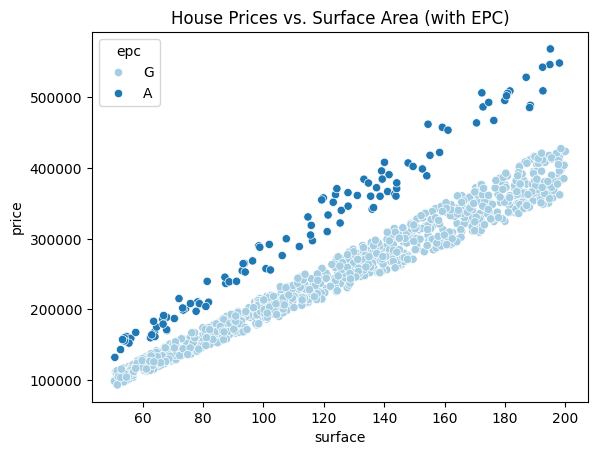

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Paired")

sns.scatterplot(y="price", x="surface", hue="epc", data=df_houses)
plt.title("House Prices vs. Surface Area (with EPC)")
plt.show()

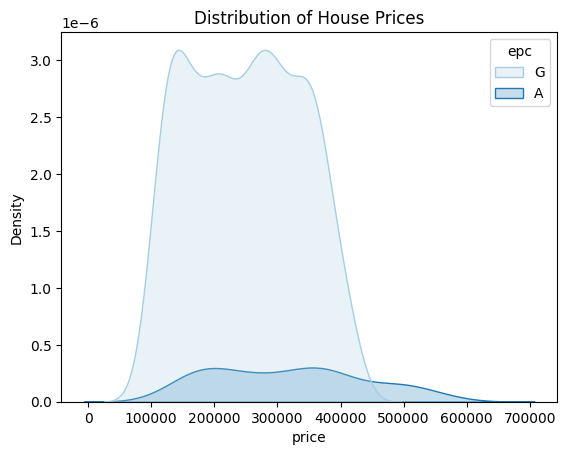

In [31]:
sns.kdeplot(data=df_houses, x="price", hue="epc", fill=True)
plt.title("Distribution of House Prices")
plt.show()

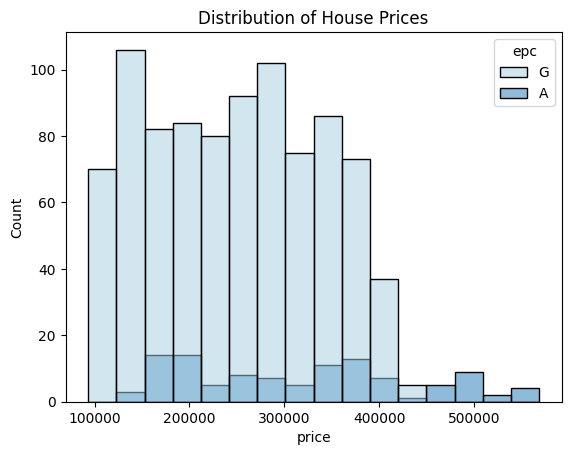

In [8]:
sns.histplot(data=df_houses, x="price", hue="epc", fill=True)
plt.title("Distribution of House Prices")
plt.show()

### GPR - Single Regressor

There are multiple libraries that model GPs but for simplicity we focus on scikit learn implementation.

https://scikit-learn.org/stable/modules/gaussian_process.html



In [9]:
df_train = df_houses.sample(frac=0.8, random_state=42)
df_test = df_houses.drop(df_train.index)

X_train = df_train['surface'].values.reshape(-1, 1)
y_train = df_train['price'].values.reshape(-1, 1)

In [10]:
mean_price = df_houses['price'].mean()

print(f"Mean Price: {mean_price:.2f}")

Mean Price: 255754.89


In [11]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(10, 20))  + WhiteKernel(noise_level=0.5, noise_level_bounds=(500, 50000))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


In [12]:
# map the n_samples to n columns of df_houses
# gaussian_process.sample_y(df_houses['surface'].values.reshape(-1, 1), n_samples=5, random_state=13).shape

# Define the number of samples
n_samples = 3

# Generate samples
samples = gaussian_process.sample_y(df_houses[['surface']], n_samples=n_samples, random_state=13)

# Assign samples to new columns with dynamic names
for i in range(n_samples):
    df_houses[f'price_GP_prior_{chr(65 + i)}'] = samples[:, i]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


In [13]:
# df_houses['price_GP_prior_A'] = gaussian_process.sample_y(df_houses['surface'].values.reshape(-1, 1), random_state=13)
#df_houses['price_GP_prior_B'] = gaussian_process.sample_y(df_houses['surface'].values.reshape(-1, 1), random_state=42)

In [14]:
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 20. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 50000. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=20) + WhiteKernel(noise_level=5e+04)

In [15]:
mean_prediction, std_prediction = gaussian_process.predict(df_houses['surface'].values.reshape(-1, 1), return_std=True)

In [16]:
std_prediction.min(), std_prediction.max()

(224.69522930963478, 229.3343209228478)

In [17]:
df_houses['flag_dataset'] = 'test'
df_houses.loc[df_houses.index.isin(df_train.index), 'flag_dataset'] = 'train'
df_houses['price_GP'] = mean_prediction
df_houses['price_GP_min'] = mean_prediction - 1.96 * std_prediction
df_houses['price_GP_max'] = mean_prediction + 1.96 * std_prediction

In [18]:
df_houses.sort_values("price_GP", ascending=False).head()

,price,surface,epc,price_GP_prior_A,price_GP_prior_B,price_GP_prior_C,flag_dataset,price_GP,price_GP_min,price_GP_max
464,363727.994064,194.325882,G,-0.828342,-0.882672,1.009008,train,395798.469629,395356.763917,396240.175341
140,378713.627026,194.367094,G,-0.315637,-1.249151,-1.708369,train,395798.447494,395356.721486,396240.173502
313,350565.422707,194.397262,G,-0.748013,-1.344374,-0.138533,test,395797.963250,395356.222172,396239.704329
469,363273.829100,194.483381,G,-0.277291,-0.323382,0.633318,train,395794.395303,395352.610199,396236.180408
366,374726.749047,194.178585,G,-0.576431,-0.394314,0.506050,test,395792.548165,395350.912302,396234.184027


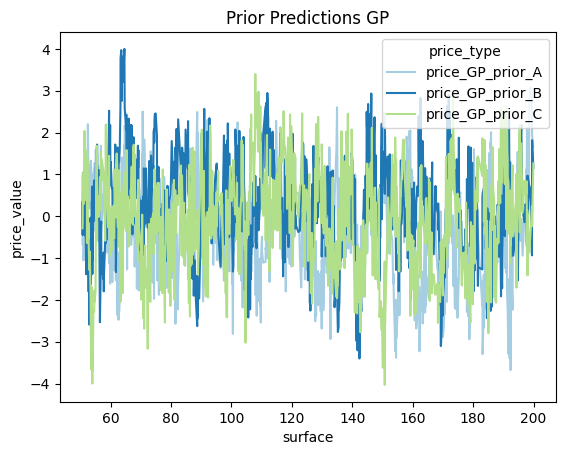

In [19]:
base_columns = ["flag_dataset", "surface"]
priors = [f"price_GP_prior_{chr(65 + i)}" for i in range(n_samples)]

df_houses_melt = (
    df_houses
    .loc[:, base_columns + priors]
    .melt(
        id_vars=base_columns,
        value_vars=priors,
        var_name="price_type",
        value_name="price_value",
    )
)

sns.lineplot(y="price_value", x="surface", hue="price_type", data=df_houses_melt)
plt.title("Prior Predictions GP")
plt.show()

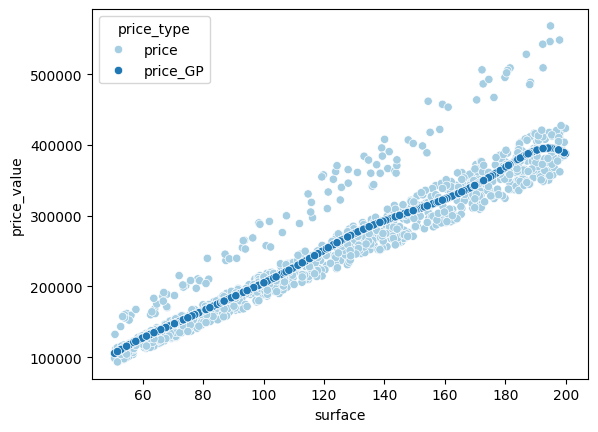

In [20]:
df_houses_melt = (
    df_houses
    .loc[:, ["flag_dataset", "surface", "price", "price_GP"]]
    .melt(
        id_vars=["flag_dataset", "surface"],
        value_vars=["price", "price_GP"],
        var_name="price_type",
        value_name="price_value",
    )
)

sns.scatterplot(y="price_value", x="surface", hue="price_type", data=df_houses_melt)
plt.show()

### GPR - Multiple regressors

In [21]:
# transform "epc" to dummy
X_train_2 = np.hstack((X_train, pd.get_dummies(df_train['epc']).values))

In [22]:
# Define kernel for surface
kernel_surface = C(1.0, (1e-2, 1e2)) * RBF(length_scale=50, length_scale_bounds=(10, 200))

# Define kernel for dummy-encoded epc
kernel_epc = C(1.0, (1e-2, 1e2)) * RBF(length_scale=1, length_scale_bounds=(0.1, 10))

# Combine the kernels (e.g., additive)
kernel = kernel_surface + kernel_epc + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-5, 1e1))

In [23]:
# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(10, 20))  + WhiteKernel(noise_level=0.5, noise_level_bounds=(500, 50000))
gaussian_process_2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process_2.fit(X_train_2, y_train)
gaussian_process_2.kernel_

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernel

10**2 * RBF(length_scale=90.3) + 10**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=10)

In [24]:
X = np.hstack((df_houses['surface'].values.reshape(-1, 1), pd.get_dummies(df_houses['epc']).values))
mean_prediction_2, std_prediction_2 = gaussian_process_2.predict(X, return_std=True)

In [25]:
std_prediction_2.min(), std_prediction_2.max()

(3.4835413771369343, 10.580345244533525)

In [26]:
df_houses['price_GP_2'] = mean_prediction_2
df_houses['price_GP_2_min'] = mean_prediction_2 - 1.96 * std_prediction_2
df_houses['price_GP_2_max'] = mean_prediction_2 + 1.96 * std_prediction_2

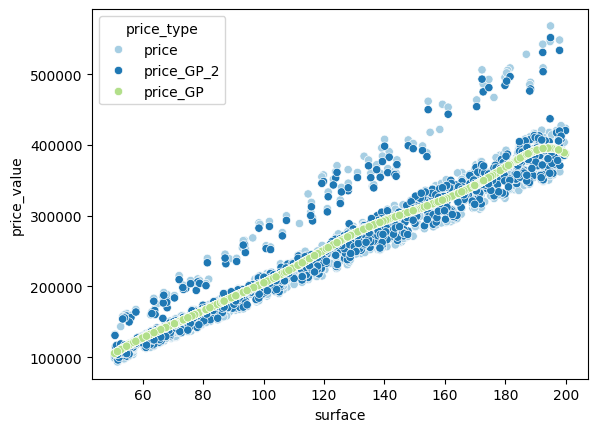

In [27]:
df_houses_melt = (
    df_houses
    .loc[:, ["flag_dataset", "surface", "price", "price_GP", "price_GP_2"]]
    .melt(
        id_vars=["flag_dataset", "surface"],
        value_vars=["price", "price_GP_2", "price_GP"],
        var_name="price_type",
        value_name="price_value",
    )
)

sns.scatterplot(y="price_value", x="surface", hue="price_type", data=df_houses_melt)
plt.show()

#### 🚨 Out of Sample Predictions

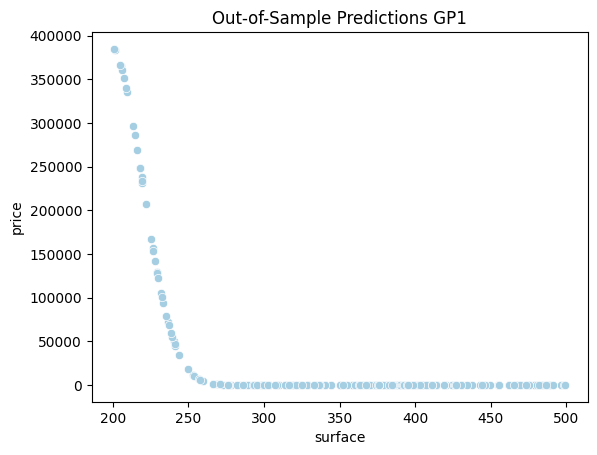

In [28]:
surface_oos = np.random.uniform(201, 500, 200)

mean_prediction_oos, std_prediction_oos = gaussian_process.predict(surface_oos.reshape(-1, 1), return_std=True)

df_houses_oos = pd.DataFrame({
    'surface': surface_oos,
    'price': mean_prediction_oos
})

sns.scatterplot(y="price", x="surface", data=df_houses_oos)
plt.title("Out-of-Sample Predictions GP1")
plt.show()

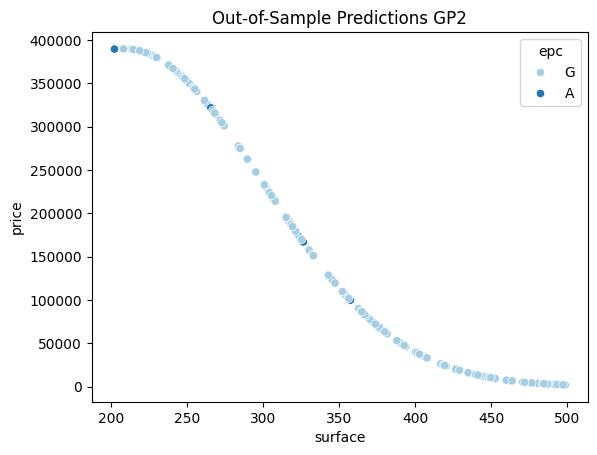

In [29]:
surface_oos = np.random.uniform(201, 500, 200)
# pd.get_dummies(df_houses['epc']).values)
epc_oos = np.random.choice(['A', 'G'], size=len(surface_oos), p=[0.10, 0.9])
epc_oos_dummy = pd.get_dummies(epc_oos).values

X_oos = np.hstack((surface_oos.reshape(-1, 1), epc_oos_dummy))


mean_prediction_oos_2, std_prediction_oos_2 = gaussian_process_2.predict(X_oos, return_std=True)

df_houses_oos = pd.DataFrame({
    'surface': surface_oos,
    'epc': epc_oos,
    'price': mean_prediction_oos_2
})

sns.scatterplot(y="price", x="surface", hue='epc', data=df_houses_oos)
plt.title("Out-of-Sample Predictions GP2")
plt.show()

## Conclusions

Key Limitations of Gaussian Processes:

1. Computational Complexity
- Computational cost grows cubically with dataset size
- Becomes impractical for large datasets (>10,000 points)
- Matrix inversions and determinant calculations are expensive

2. Hyperparameter Sensitivity
- Performance heavily depends on kernel selection
- Requires careful tuning of covariance function parameters
- Small changes in hyperparameters can significantly alter predictions

3. Scalability Issues
- Memory requirements increase quadratically with data points
- Not suitable for high-dimensional or massive datasets
- Requires approximation techniques like sparse GP for large-scale problems

4. Assumption Constraints
- Assumes underlying data follows Gaussian distribution
- Struggles with multi-modal or highly non-linear relationships
- Limited interpretability compared to some traditional models

5. Probabilistic Limitations
- Generates smooth, continuous predictions
- May not capture sharp discontinuities or abrupt changes
- Tends to produce conservative uncertainty estimates

6. Training Data Dependence
- Performance heavily relies on quality and representativeness of training data
- Sensitive to outliers and noise
- Requires careful data preprocessing and selection

## References
* Wang, Jie. (2023). *An intuitive tutorial to Gaussian processes regression.* Computing in Science & Engineering.
* C. E. Rasmussen and C. K. I. Williams. (2006) *Gaussian Processes for Machine Learning*. The MIT Press.
* PyData. (2024) *Alexandre Andorra & Christopher Fonnesbeck- Mastering Gaussian Processes with PyMC | PyData NYC 2024*. Youtube.